In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/content/superstore_dataset2011-2015.csv', encoding='latin-1')

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
df.shape

(51290, 24)

In [ ]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.drop(['Row ID','Order ID','Customer ID','Customer Name','Product ID','Postal Code'],axis=1,inplace=True)

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('*'*75)

Order Date
['1/1/2011' '1/2/2011' '1/3/2011' ... '31-12-2012' '31-12-2013'
 '31-12-2014']
***************************************************************************
Ship Date
['6/1/2011' '8/1/2011' '5/1/2011' ... '5/1/2015' '6/1/2015' '7/1/2015']
***************************************************************************
Ship Mode
['Standard Class' 'Second Class' 'First Class' 'Same Day']
***************************************************************************
Segment
['Consumer' 'Home Office' 'Corporate']
***************************************************************************
City
['Constantine' 'Wagga Wagga' 'Budapest' ... 'Missoula' 'Lannion'
 'Deer Park']
***************************************************************************
State
['Constantine' 'New South Wales' 'Budapest' ... 'Medea' 'Jizzakh'
 'Inhambane']
***************************************************************************
Country
['Algeria' 'Australia' 'Hungary' 'Sweden' 'Bangladesh' 'United States'
 'Angol

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y',errors="coerce").fillna(pd.to_datetime(df['Order Date'], format="d-%m-%Y", errors="coerce"))
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y',errors="coerce").fillna(pd.to_datetime(df['Ship Date'], format="d-%m-%Y", errors="coerce"))

In [ ]:
df['Ship Mode'] = df['Ship Mode'].replace({'Same Day':0,'First Class':1,'Second Class':2,'Standard Class':3}) 
df['Order Priority'] = df['Order Priority'].replace({'Critical':3,'High':2,'Medium':1,'Low':0})

In [ ]:
cat_cols = df.select_dtypes('object')
num_cols = df.select_dtypes('number')

In [ ]:
num_cols.describe()

,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2.348372,246.490581,3.476545,0.142908,28.610982,26.375915,1.408286
std,0.914135,487.565361,2.278766,0.212280,174.340972,57.296804,0.699603
min,0.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.000000
25%,2.000000,30.758625,2.000000,0.000000,0.000000,2.610000,1.000000
50%,3.000000,85.053000,3.000000,0.000000,9.240000,7.790000,1.000000
75%,3.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2.000000
max,3.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,3.000000


In [ ]:
#month
#dayoftheweek
df.dropna(subset='Order Date',inplace=True)
df['Order Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Order day_of_week'] = df['Order Date'].dt.day_name()
import calendar
df['Order Month'] = df['Order Month'].apply(lambda x: calendar.month_abbr[x])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]
df['Order Month'] = pd.Categorical(df['Order Month'], categories=months, ordered=True)
df['Order day_of_week'] = pd.Categorical(df['Order day_of_week'], categories=days, ordered=True)

In [ ]:
#year
df['Order Year'] = pd.DatetimeIndex(df['Order Date']).year

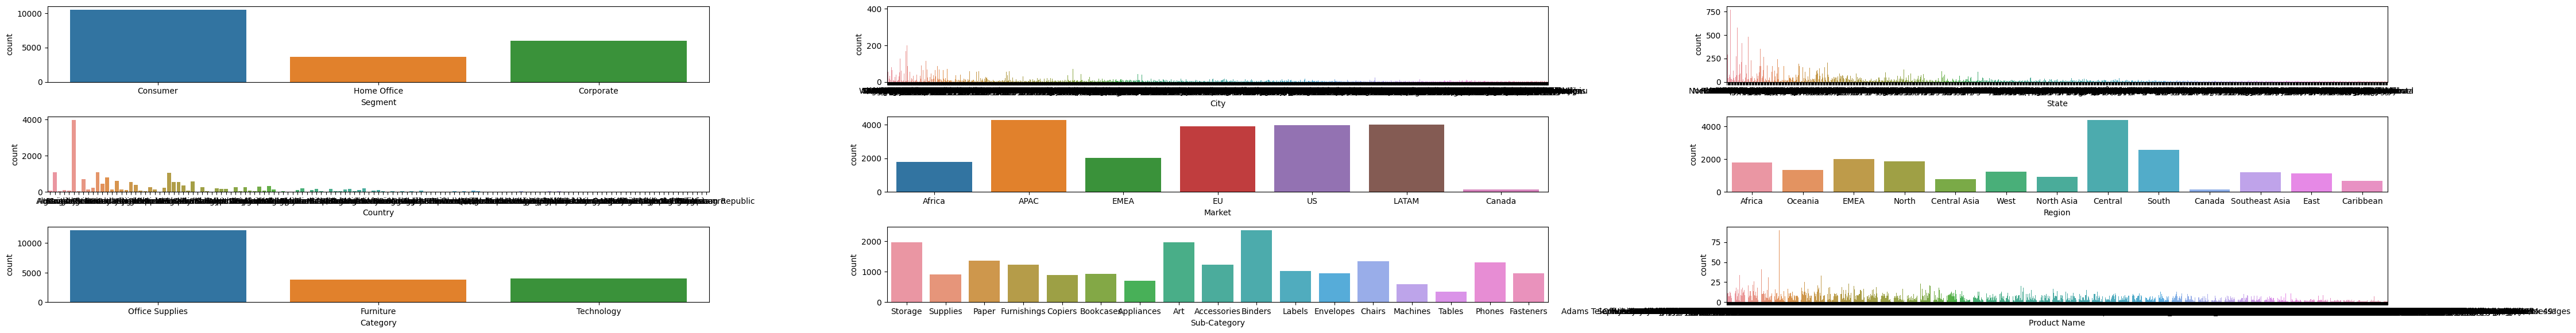

In [ ]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(45,40))

for col in cat_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.countplot(x=df[col])
  c=c+1

plt.tight_layout()
plt.show()

In [ ]:
df['Country'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
df['State'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
df['City'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
df['Product Name'].value_counts().sort_values(ascending=False)[:10]

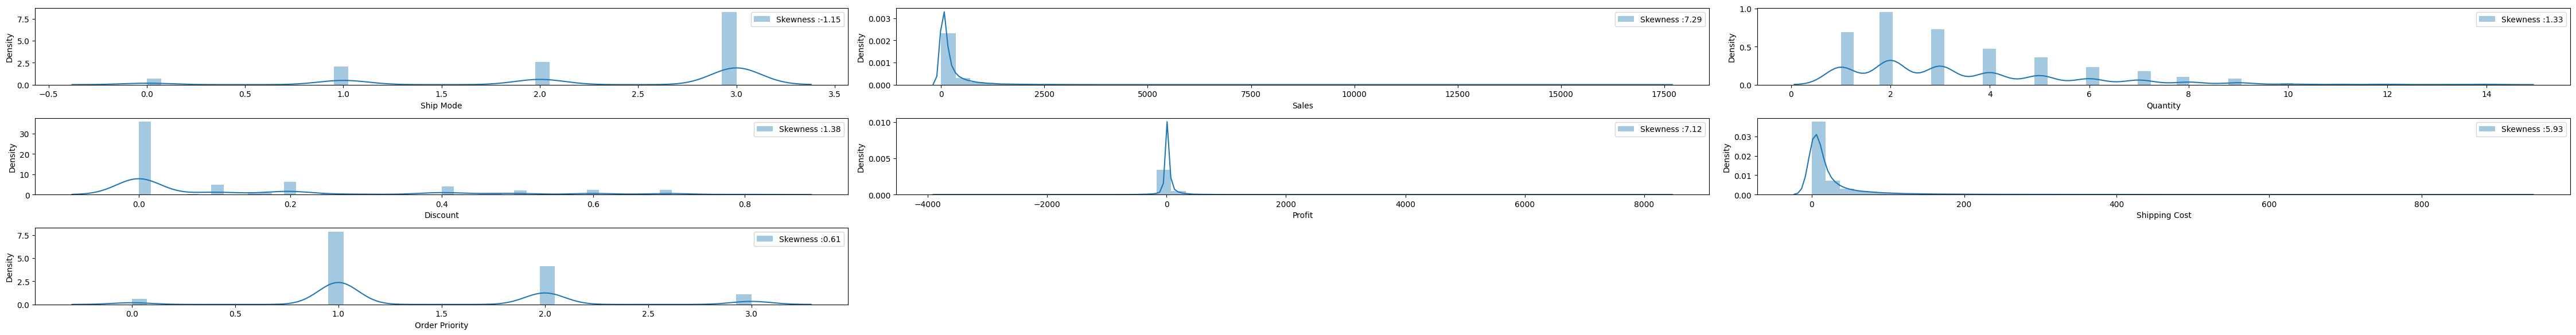

In [ ]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(45,40))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.distplot(x=df[col],label='Skewness :%.2f'%(df[col].skew()))
  plt.legend()
  c=c+1

plt.tight_layout()
plt.show()

In [ ]:
#ship mode negatively skewed
#sales - quantity -  discount - shipping cost - order priority positively skewed


In [ ]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order day_of_week,Order Year
0,2011-01-01,2011-01-06,3,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,1,Jan,Saturday,2011
1,2011-01-01,2011-01-08,3,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,1,Jan,Saturday,2011
2,2011-01-01,2011-01-05,2,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,2,Jan,Saturday,2011
3,2011-01-01,2011-01-05,2,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,2,Jan,Saturday,2011
4,2011-01-01,2011-01-08,3,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,1,Jan,Saturday,2011


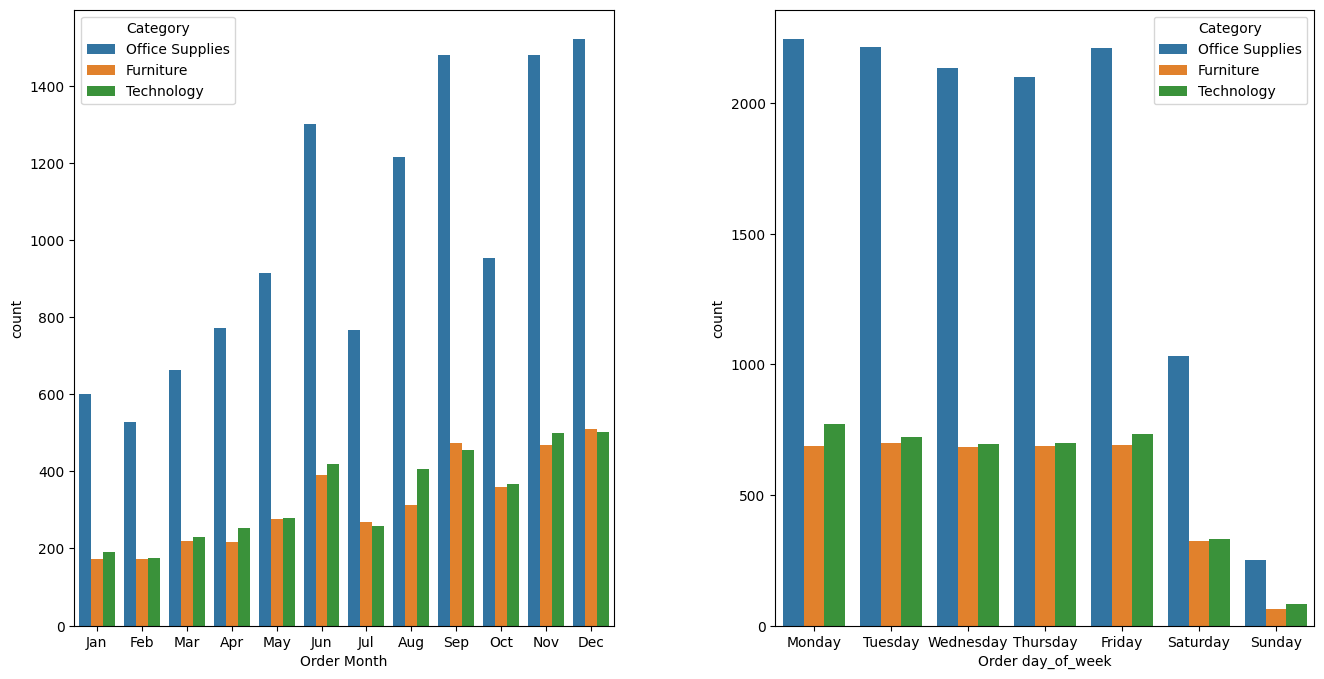

In [ ]:
plt.figure(figsize = (16,8))
grid = plt.GridSpec(2, 2, wspace =0.3, hspace = 0.8)

g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])

sns.countplot(x=df['Order Month'],hue=df['Category'],ax=g1)
sns.countplot(x=df['Order day_of_week'],hue=df['Category'],ax=g2)
plt.show()

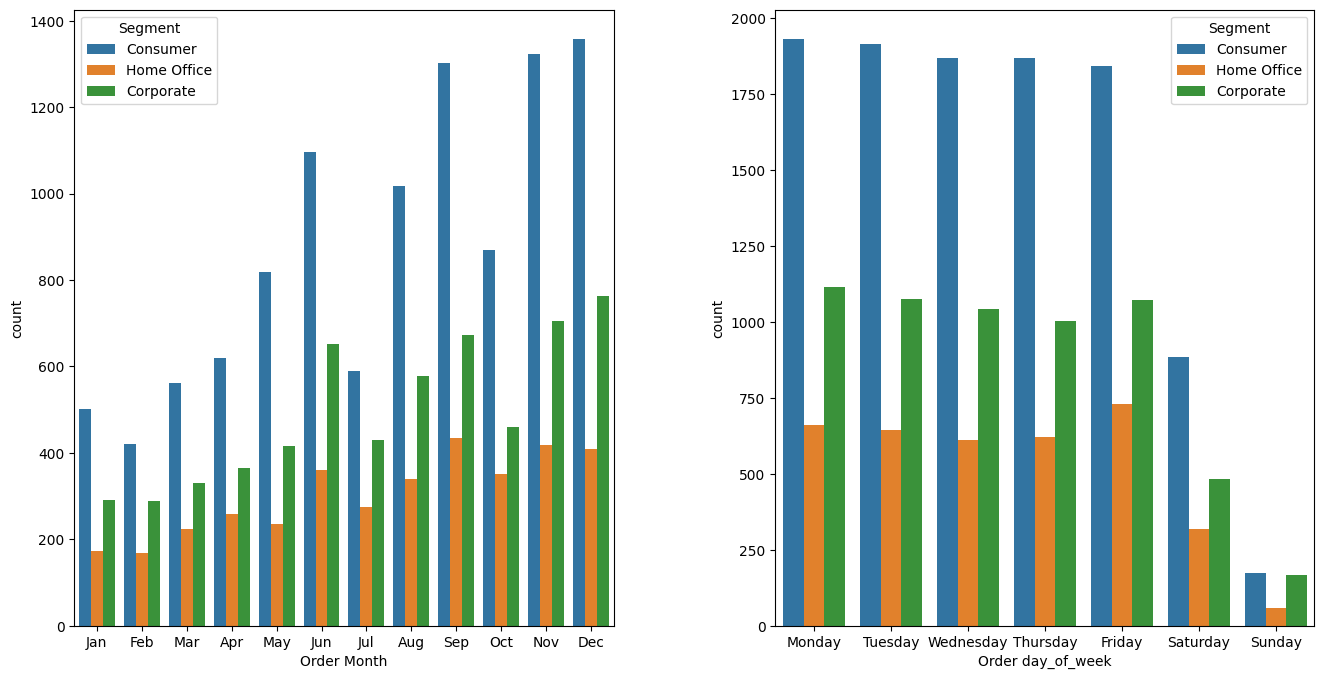

In [ ]:
plt.figure(figsize = (16,8))
grid = plt.GridSpec(2, 2, wspace =0.3, hspace = 0.8)

g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])

sns.countplot(x=df['Order Month'],hue=df['Segment'],ax=g1)
sns.countplot(x=df['Order day_of_week'],hue=df['Segment'],ax=g2)
plt.show()

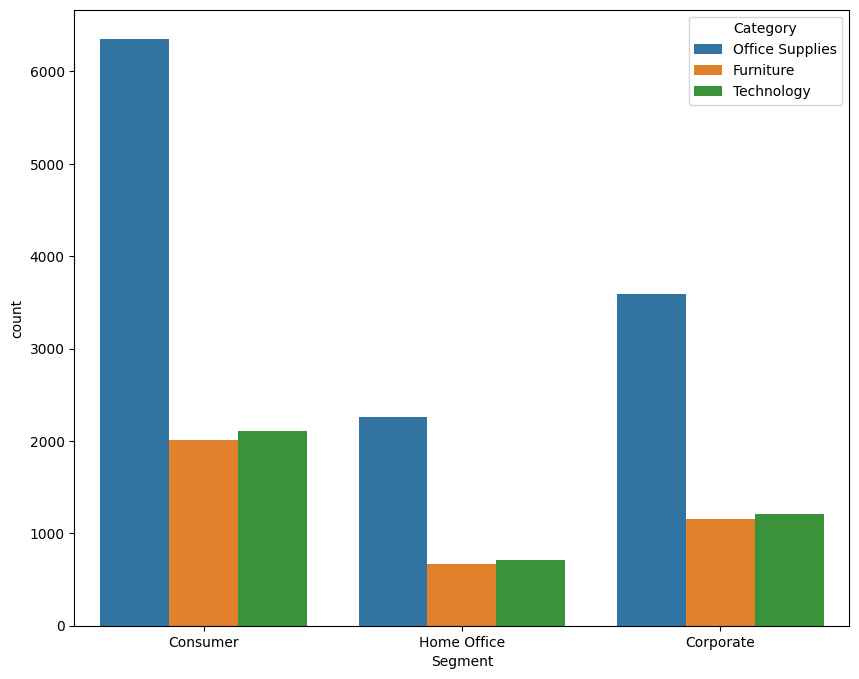

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['Segment'],hue=df['Category'])
plt.show()

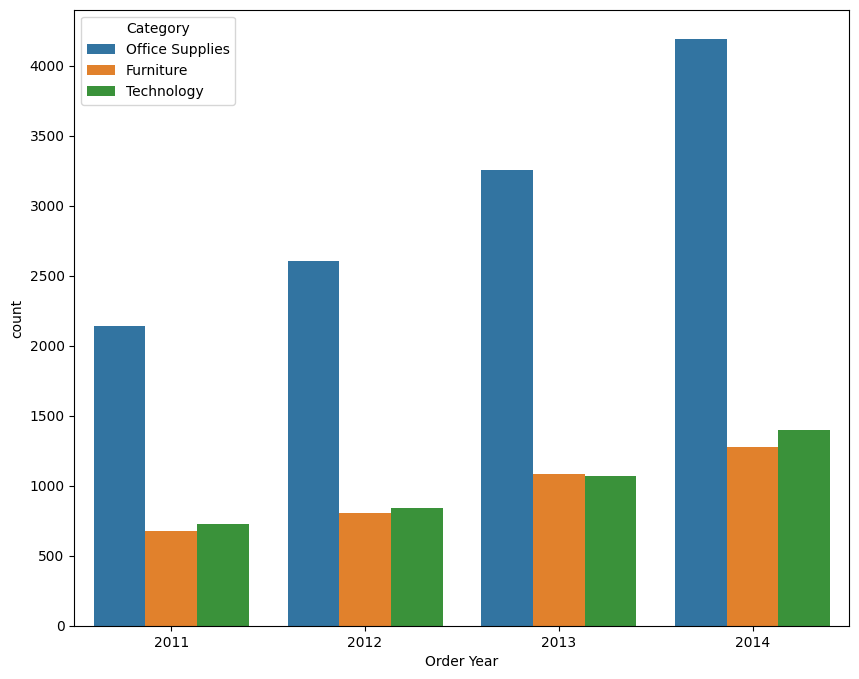

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['Order Year'],hue=df['Category'])
plt.show()

In [ ]:
# orders growing year after year in all categories

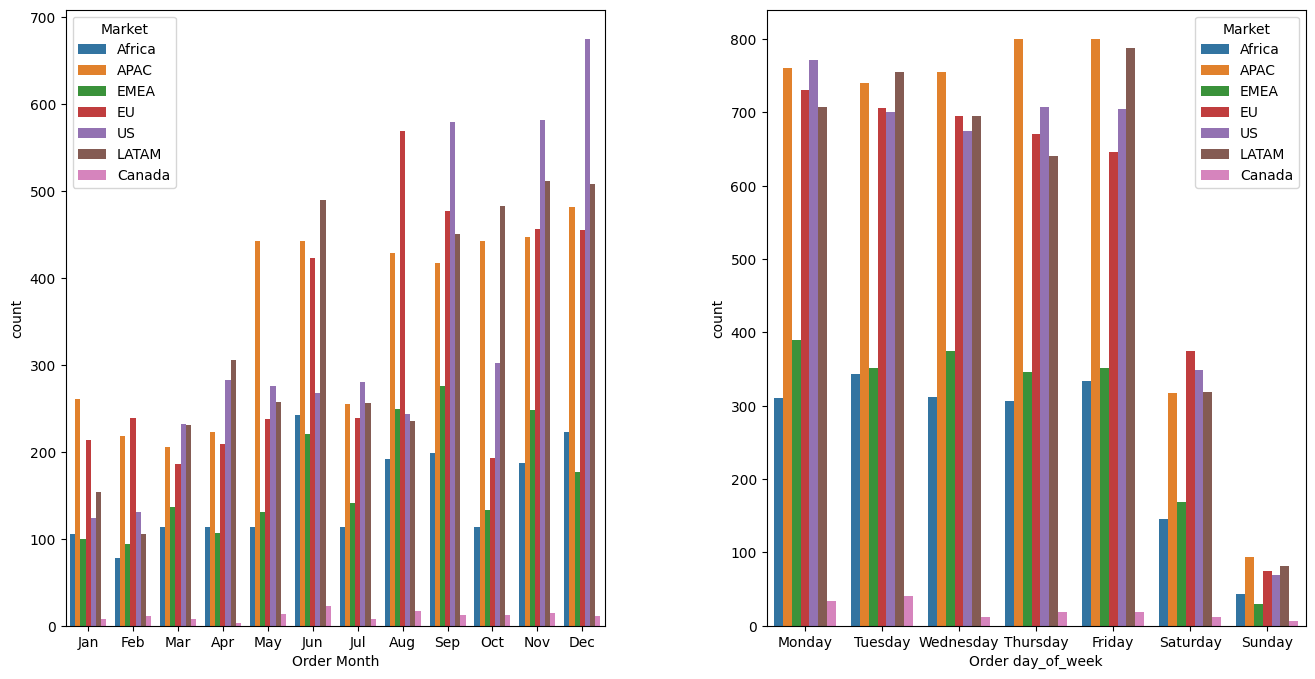

In [ ]:
plt.figure(figsize = (16,8))
grid = plt.GridSpec(2, 2, wspace =0.3, hspace = 0.8)

g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])

sns.countplot(x=df['Order Month'],hue=df['Market'],ax=g1)
sns.countplot(x=df['Order day_of_week'],hue=df['Market'],ax=g2)
plt.show()

In [ ]:
# most orders made in September - November and December
# order numbers going up as the year progresses
# very few order made on the weekend

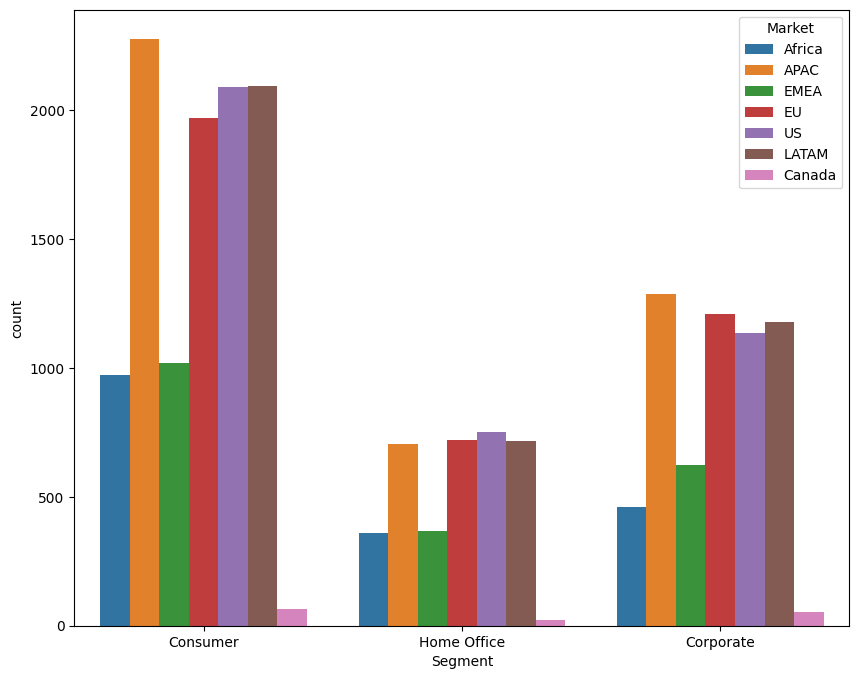

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['Segment'],hue=df['Market'])
plt.show()

In [ ]:
#most orders in consumer segment for all markets

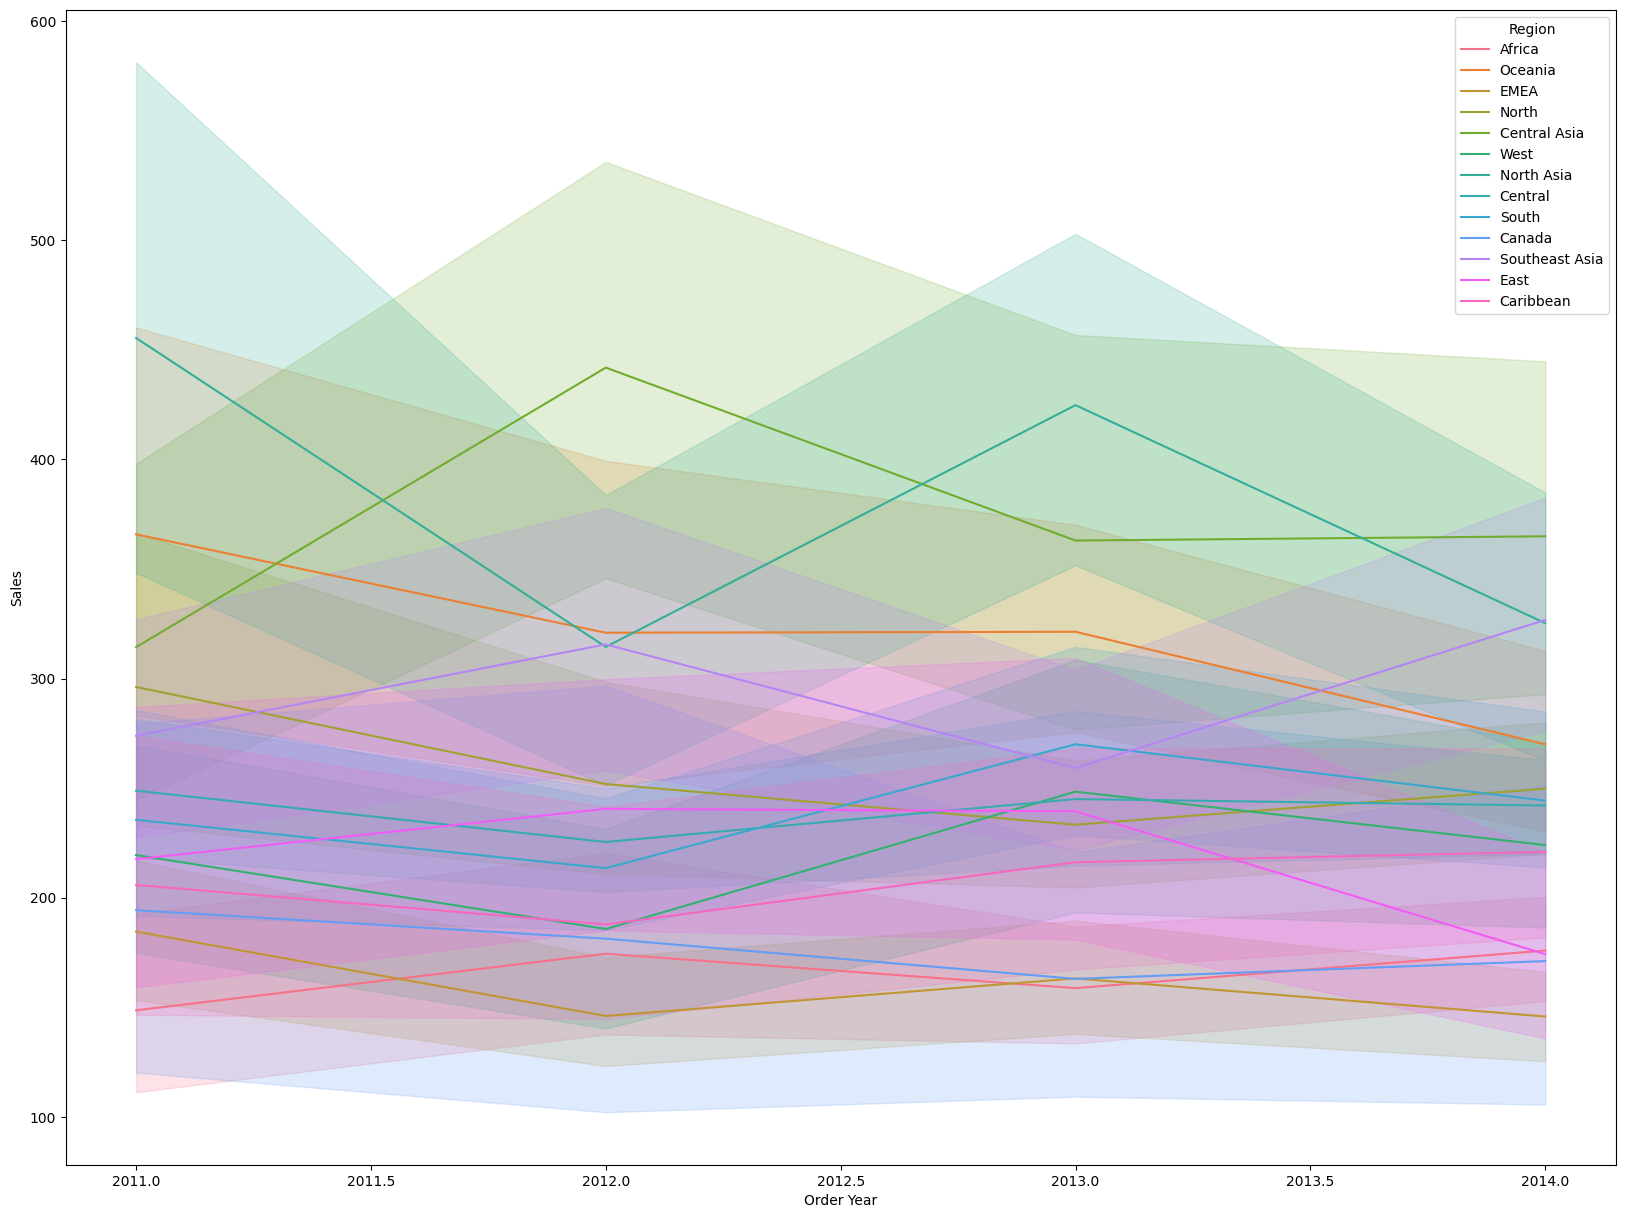

In [ ]:
plt.figure(figsize = (20,15))
sns.lineplot(x=df['Order Year'],y=df['Sales'],hue=df['Region'])
plt.show()

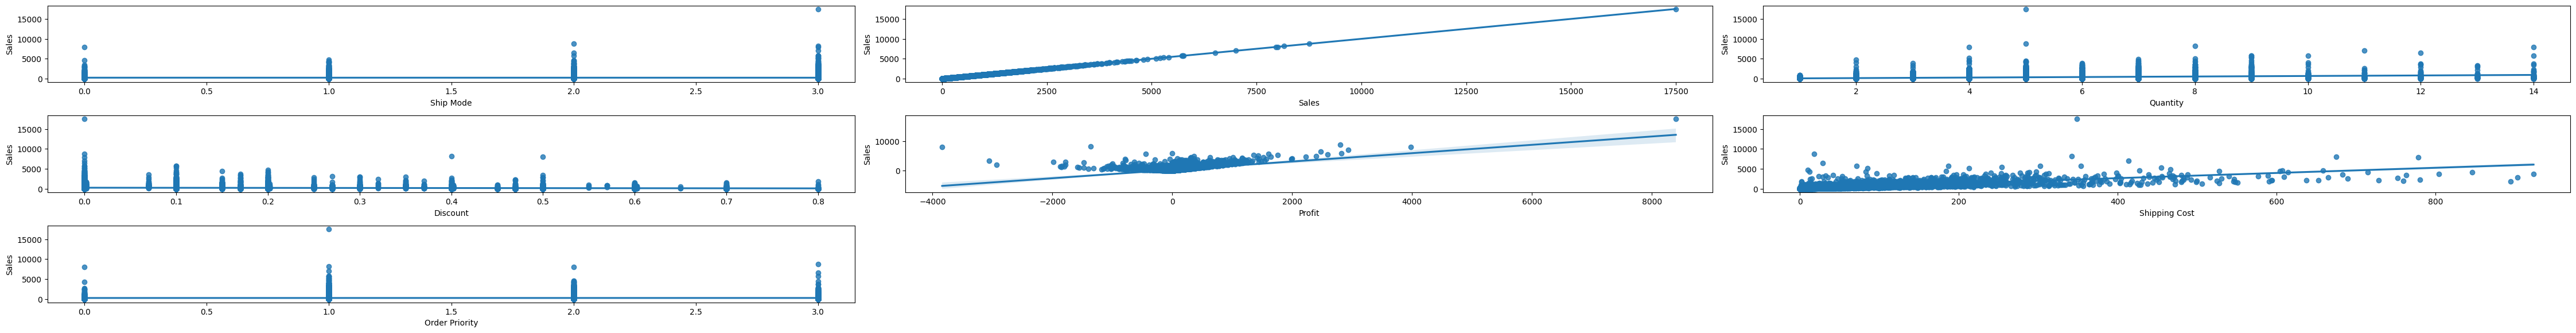

In [ ]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(45,40))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.regplot(x=df[col],y=df['Sales'])
  c=c+1

plt.tight_layout()
plt.show()

In [ ]:
#sales positively correlated to profit and shipping cost

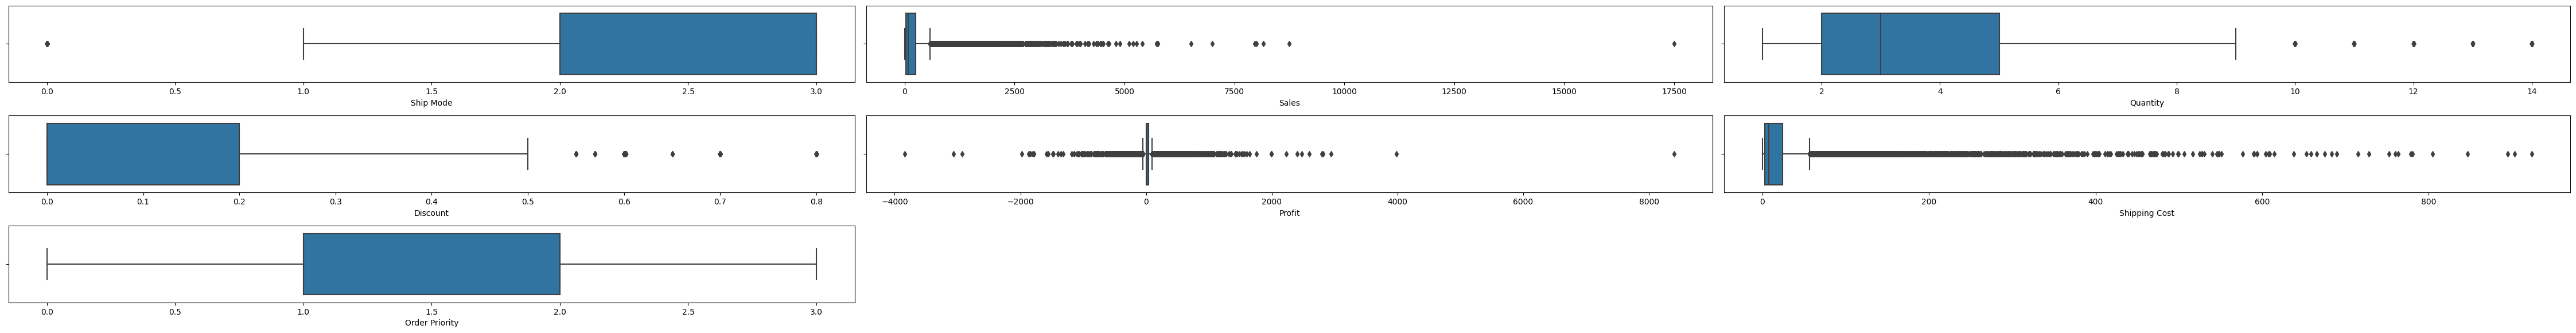

In [ ]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(45,40))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(x=df[col])
  c=c+1

plt.tight_layout()
plt.show()

In [ ]:
#outliers
#outliers
from collections import Counter
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = df[c].quantile(0.25)
        
        #3rd quartile
        Q3 = df[c].quantile(0.75)
        
        #IQR calculation
        IQR = Q3 - Q1
        lower_range = df[c].quantile(0.25) - 1.5* IQR
        upper_range = df[c].quantile(0.75) + 1.5* IQR
        
        #Outlier detection                                    #Outlier indexes
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        #Store indexes
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    # number of outliers
    # If we have more than 5 outliers in a sample, this sample will be drop
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2 )
    #we are taking indexes
    
    return multiple_outliers
#scale
#model

In [ ]:
num_cols_list = list(num_cols)

In [ ]:
outliers = detection(df,num_cols_list)

In [ ]:
df.loc[outliers]

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order day_of_week,Order Year
114,2011-06-01,2011-06-01,0,Consumer,Istanbul,Istanbul,Turkey,EMEA,EMEA,Office Supplies,Storage,"Fellowes File Cart, Wire Frame",109.1040,2,0.60,-106.4160,17.97,3,Jun,Wednesday,2011
230,2011-11-01,2011-11-01,0,Consumer,Singapore,Singapore,Singapore,APAC,Southeast Asia,Technology,Accessories,"Memorex Router, Programmable",743.1300,3,0.00,230.3100,159.19,2,Nov,Tuesday,2011
356,2011-02-02,2011-02-02,0,Corporate,Rosenheim,Bavaria,Germany,EU,Central,Technology,Copiers,"Brother Wireless Fax, Laser",378.8100,1,0.00,140.1300,71.57,2,Feb,Wednesday,2011
380,2011-03-02,2011-03-02,0,Corporate,Bekasi,Jawa Barat,Indonesia,APAC,Southeast Asia,Furniture,Chairs,"Office Star Executive Leather Armchair, Black",682.4478,2,0.27,186.9678,48.69,1,Mar,Wednesday,2011
523,2011-09-02,2011-09-02,0,Consumer,Vienna,Vienna,Austria,EMEA,EMEA,Furniture,Tables,"Hon Conference Table, Fully Assembled",922.9500,1,0.00,341.4900,282.09,3,Sep,Friday,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11981,2013-08-10,NaT,3,Consumer,Tivoli,Lazio,Italy,EU,South,Furniture,Chairs,"Office Star Executive Leather Armchair, Black",560.9160,3,0.60,-743.2740,89.55,2,Aug,Saturday,2013
12235,2013-03-11,NaT,1,Consumer,Presidencia Roque Sáenz Peña,Chaco,Argentina,LATAM,South,Furniture,Tables,"Chromcraft Conference Table, with Bottom Storage",523.6020,3,0.70,-890.1780,97.85,2,Mar,Monday,2013
14245,2014-02-03,2014-02-05,2,Consumer,Sincan,Ankara,Turkey,EMEA,EMEA,Technology,Phones,"Motorola Speaker Phone, with Caller ID",207.6480,4,0.60,-197.3520,64.03,3,Feb,Monday,2014
14772,2014-12-03,2014-12-04,1,Consumer,Lagos,Lagos,Nigeria,Africa,Africa,Technology,Phones,"Nokia Smart Phone, Full Size",382.4100,2,0.70,-752.1300,81.83,2,Dec,Wednesday,2014


In [ ]:
data = df.drop(outliers,axis=0).reset_index(drop = True)

In [ ]:
a = len(df.columns)
b = 3
c = 1

fig = plt.figure(figsize=(45,40))

for col in num_cols:
  plt.subplot(a,b,c)
  plt.xlabel(col)
  sns.boxplot(x=data[col])
  c=c+1

plt.tight_layout()
plt.show()

In [ ]:
print(df.shape)
print(data.shape)

(20067, 21)
(18536, 21)


In [ ]:
#encode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
  data[col] = le.fit_transform(data[col])

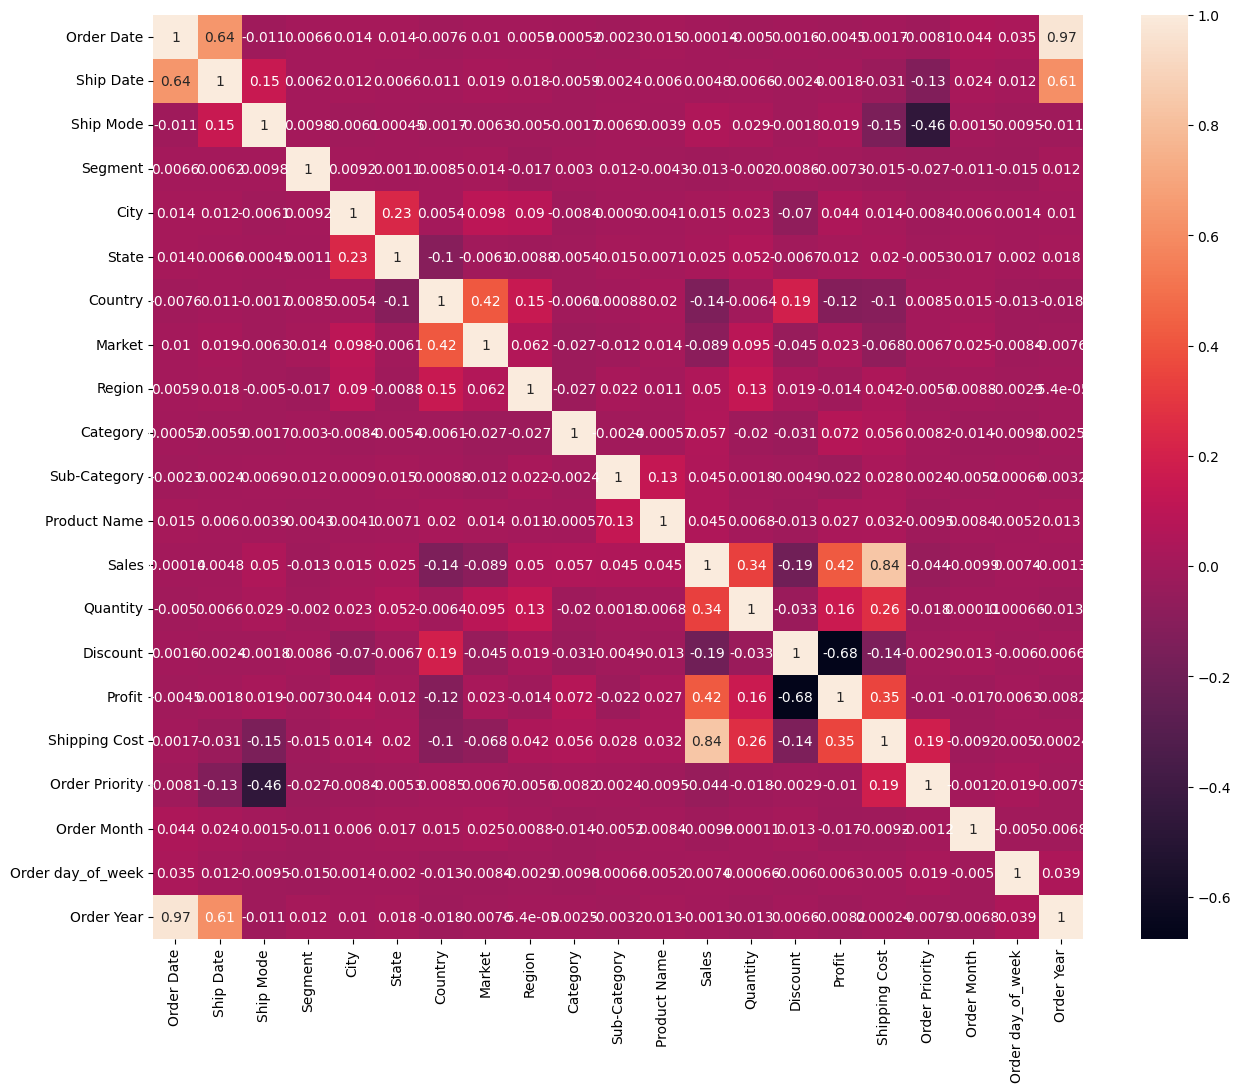

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

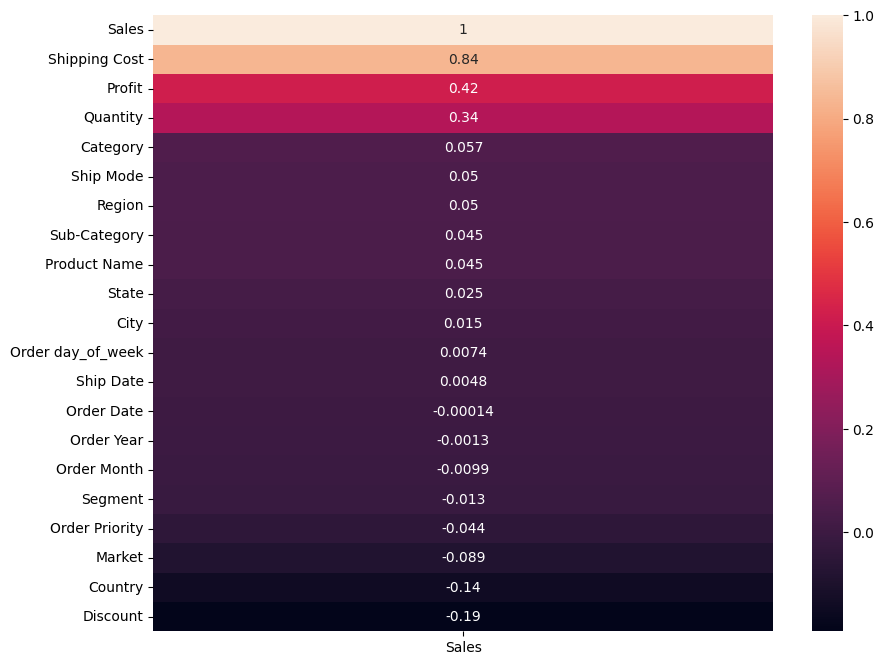

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr()[['Sales']].sort_values(ascending=False,by='Sales'),annot=True)
plt.show()

In [ ]:
#as expected high positive correlation between sales and shipping cost - profit
#highest negative correlation between sales and discount

In [ ]:
data.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order day_of_week,Order Year
0,0,2,3,0,564,214,2,1,0,1,14,3088,9648,1,0,10000,3098,1,4,2,0
1,0,4,3,0,2445,588,5,0,9,1,15,154,6005,2,3,8141,971,1,4,2,0
2,0,1,2,0,376,145,52,3,5,1,14,3057,4274,3,0,7765,816,2,4,2,0
3,0,1,2,2,2174,793,115,4,7,1,12,1206,3241,2,18,1738,481,2,4,2,0
4,0,4,3,0,2445,588,5,0,9,0,9,1108,5828,4,3,8217,469,1,4,2,0


In [ ]:
data.skew().sort_values(ascending=False)

Discount             1.395310
Quantity             1.333624
Shipping Cost        1.248233
Segment              0.671202
Order Priority       0.636363
Sales                0.298928
Sub-Category         0.099584
Region               0.044793
Product Name         0.006365
Category            -0.001788
Country             -0.002564
State               -0.052212
Order day_of_week   -0.099017
Order Month         -0.108270
Profit              -0.109535
City                -0.118063
Order Date          -0.310732
Order Year          -0.349584
Market              -0.449083
Ship Date           -0.783967
Ship Mode           -1.175181
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

data[data.columns] = ss.fit_transform(data[data.columns])

In [ ]:
X = data.drop('Sales',axis=1) 
y = data['Sales']

from statsmodels.stats import diagnostic

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
#predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3210.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:41:19   Log-Likelihood:                -12429.
No. Observations:               18536   AIC:                         2.490e+04
Df Residuals:                   18515   BIC:                         2.506e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.144e-17      0.00

In [ ]:
#R2 = 77% bon pouvoir explicatif
#8 variables pour lesquels la p-value < 0.05 ce qui nous permet de rejetter H0 hypothèse de non significativité au seuil 5%

In [ ]:
data_signi = data.drop(['Order Date','Ship Date','Segment','City','State','Order Month','Order day_of_week','Order Year'],axis=1)

In [ ]:
X = data_signi.drop('Sales',axis=1) 
y = data_signi['Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

y_pred = model.predict()
residuals = y - y_pred


print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     5350.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:41:19   Log-Likelihood:                -12432.
No. Observations:               18536   AIC:                         2.489e+04
Df Residuals:                   18523   BIC:                         2.499e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.144e-17      0.003  -9.04e

In [ ]:
#0<DW<2 -> positive autocorell des erreurs
#p-value sub category > 0.05 on ne rejette pas H0: hypothèse de non significativité au seuil 5%

In [ ]:
import statsmodels.api as sm


def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [ ]:
vif_cal(input_data=data_signi, dependent_col='Sales')

,Var,Vif
9,Profit,2.15
8,Discount,1.97
1,Country,1.32
10,Shipping Cost,1.31
11,Order Priority,1.30
0,Ship Mode,1.28
2,Market,1.26
7,Quantity,1.13
3,Region,1.04
5,Sub-Category,1.02


In [ ]:
#Vif<5 pour toutes les variables -> pas de signe de multicolinéarité 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


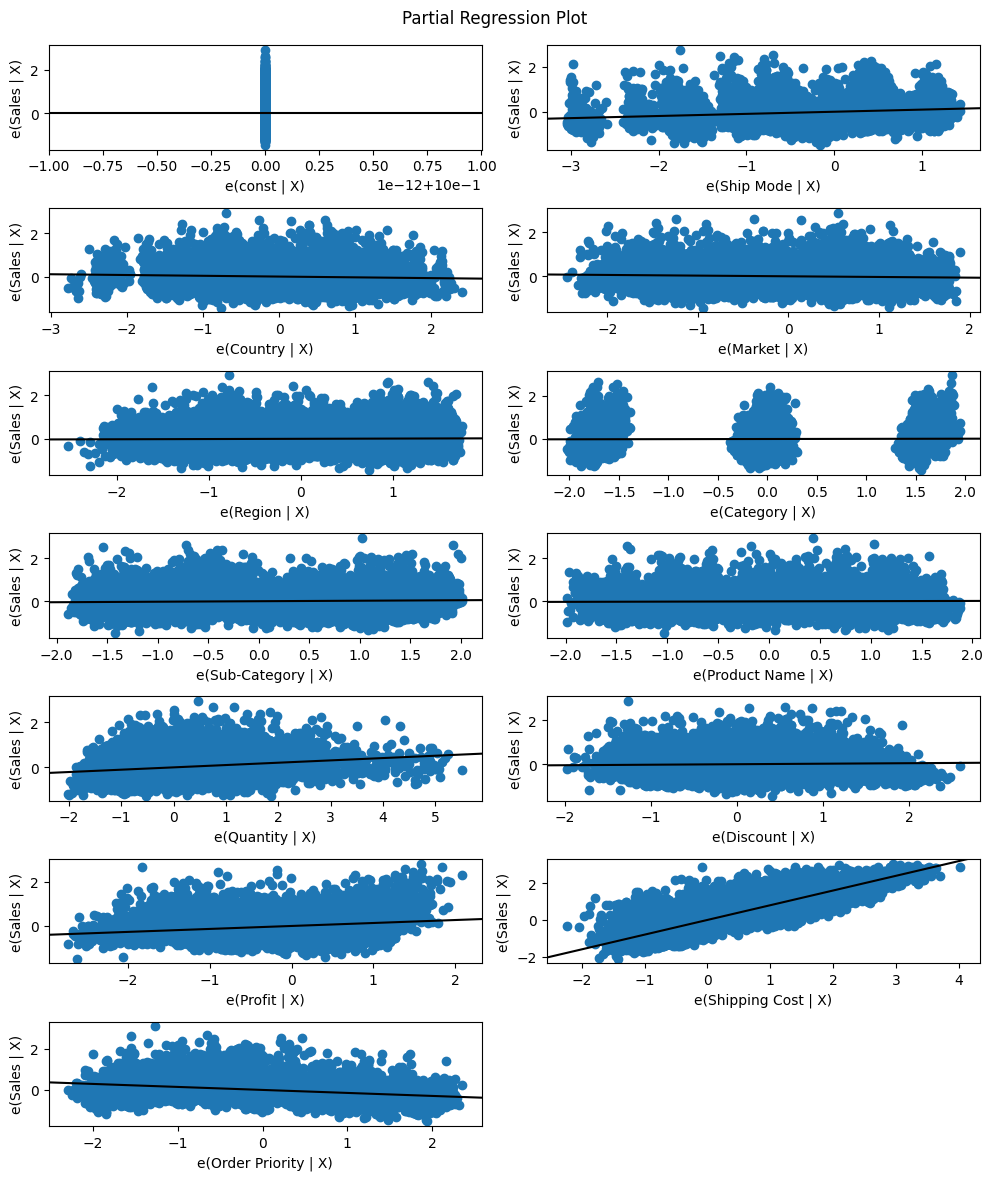

In [ ]:
fig = plt.figure(figsize=(10,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
#relation lineaire tres faible pour bcp de variables explicatives avec la variable expliquées

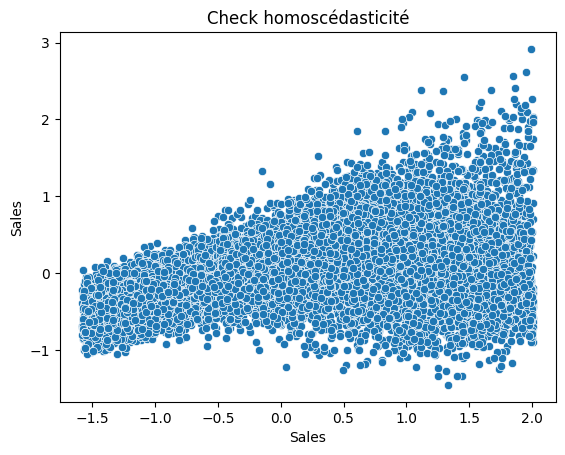

In [ ]:
sns.scatterplot(x=y,y=residuals)
plt.title('Check homoscédasticité')
plt.show()

In [ ]:
#forme de cone tres apparente soupcons d'héteroscédas

import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 424.395012909603),
 ('p-value', 2.562239218119253e-83),
 ('f-value', 36.16957575786253),
 ('f p-value', 2.52101731901097e-84)]

In [ ]:
# p-value < 0,05 on rejette H0: hypothese d'homoscedasticité

In [ ]:
print(data_signi['Sales'].skew())
print(np.log1p(data_signi['Sales']).skew())

0.29892817244484776
-1.6807268253572318


In [ ]:
#dependent variable very very slighty skewed and log makes it worse so ill just accept the heteroscedasiticty

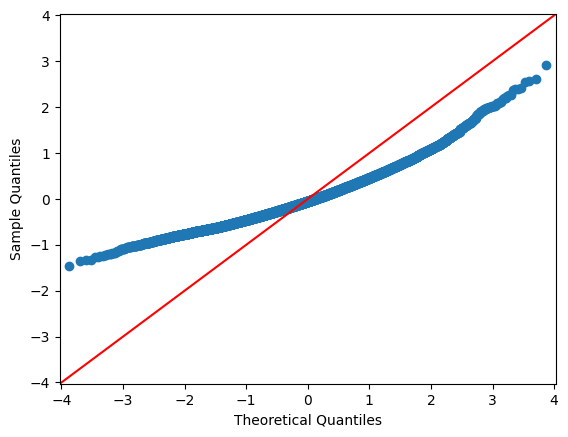

In [ ]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

In [ ]:
#distribution normale des résidus
# Prob(JB) < 0,05 on rejette H0: distribution normale des résidus

In [ ]:
# pas le meilleur modele
# cherche un qui gere bien le peu de relation linéaire avec la variable a expliquer - heterosce

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()

regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf)]

In [ ]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    '{:s} : {:.0f} %'.format(regressor_name, accuracy)
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))

Linear Regression : 78 %
K Nearest Neighbours : 85 %
Decision Tree : 86 %
Random Forest : 93 %


In [ ]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = mean_absolute_error(y_test,y_pred)
    
    print('{:s} : {}'.format(regressor_name, accuracy))

Linear Regression : 0.37491124580335383
K Nearest Neighbours : 0.29674925178594647
Decision Tree : 0.26498117542530786
Random Forest : 0.1923263036504866


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 92.79 %
Standard Deviation: 0.52 %


In [ ]:
#random forest meilleur modele